In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/top50 (1).csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
df.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

# Rename columns
df = df.rename(columns={'Track.Name': 'track_name', 'Artist.Name': 'artist_name', 'Genre': 'genre', 'Beats.Per.Minute': 'bpm',
                        'Energy': 'energy', 'Danceability': 'danceability', 'Loudness..dB..': 'loudness', 'Liveness': 'liveness',
                        'Valence.': 'valence', 'Length.': 'length', 'Acousticness..': 'acousticness', 'Speechiness.': 'speechiness',
                        'Popularity': 'popularity'})

In [ ]:
df.describe()

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


<ipython-input-9-415bbe168570>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


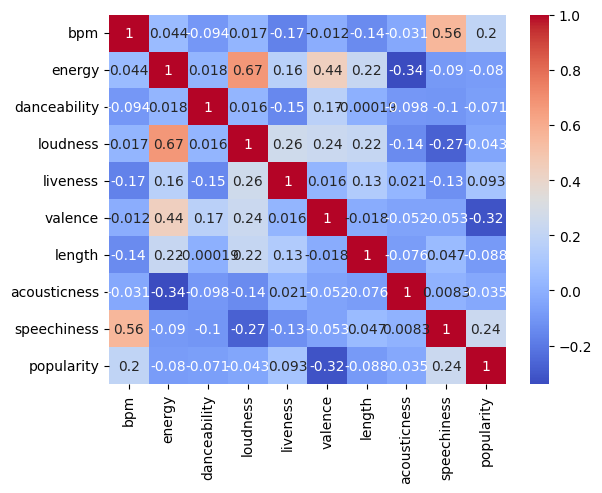

In [ ]:
# Check the correlation between the numerical columns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

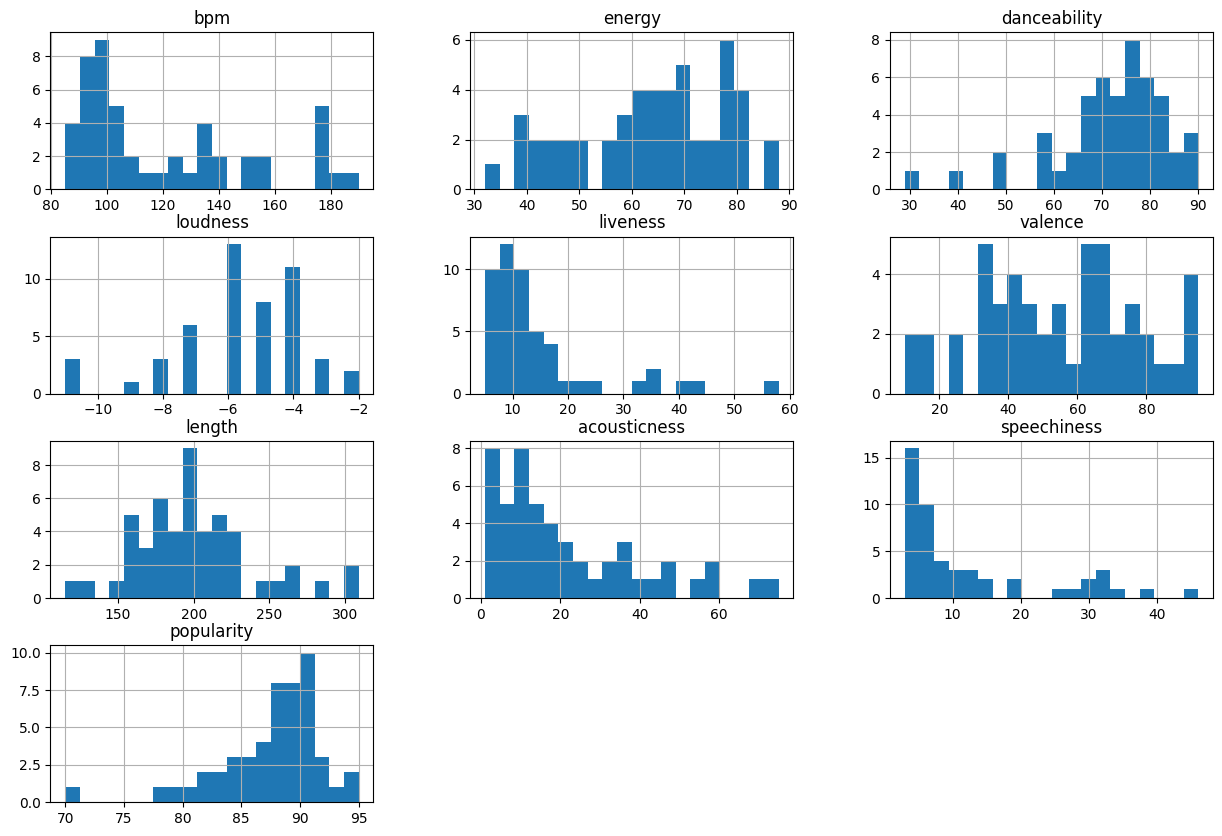

In [ ]:
# Visualize the distribution of each numerical column
df.hist(bins=20, figsize=(15,10))
plt.show()

In [ ]:
genre_dummies = pd.get_dummies(df['genre'])

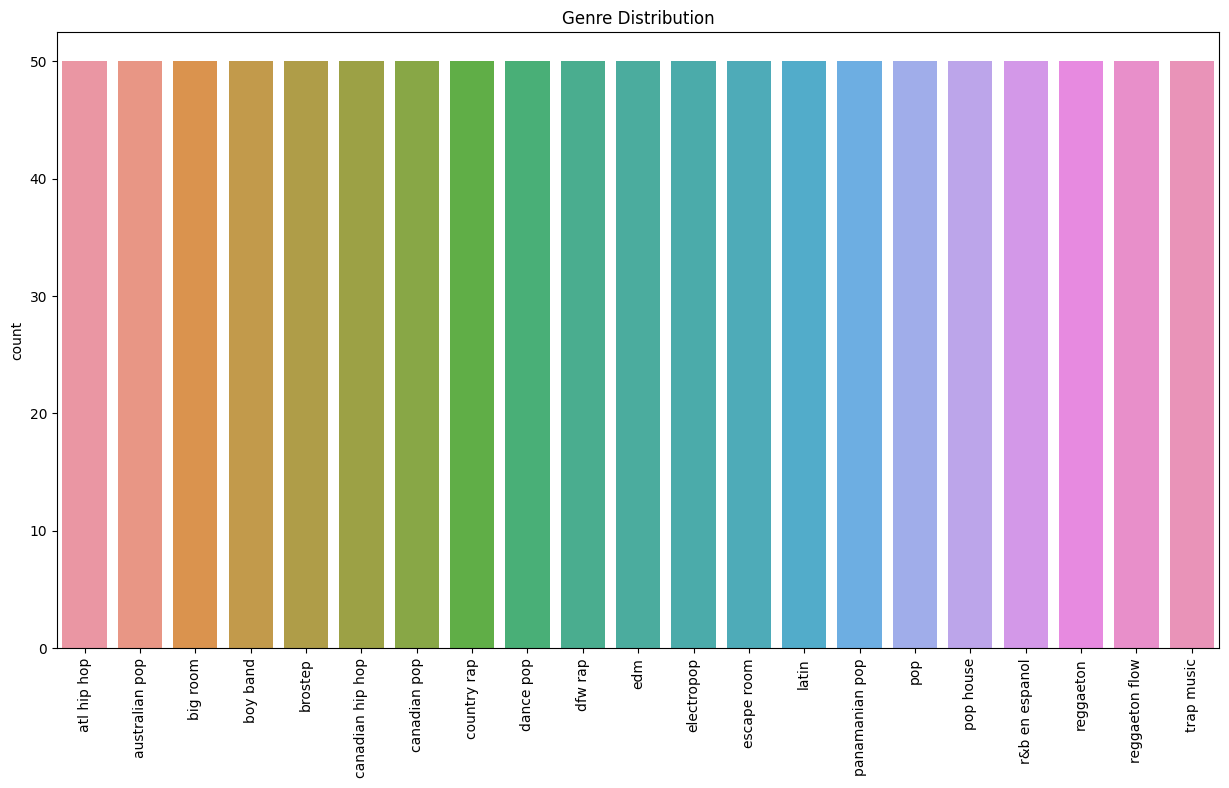

In [ ]:
# Visualize the genre distribution
plt.figure(figsize=(15,8))
plt.title('Genre Distribution')
sns.countplot(data=genre_dummies)
plt.xticks(rotation=90)
plt.show()

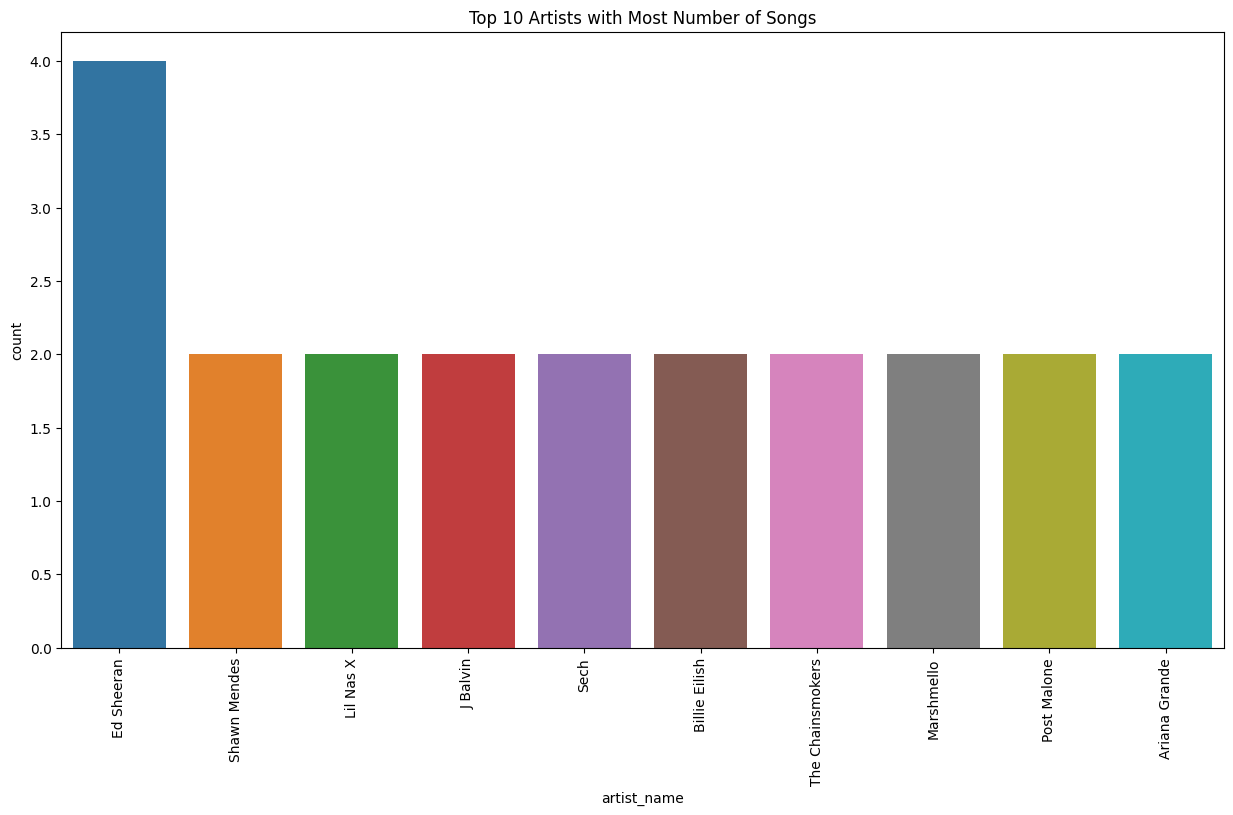

In [ ]:
# Visualize the top 10 artists with the most number of songs in the dataset

plt.figure(figsize=(15,8))
plt.title('Top 10 Artists with Most Number of Songs')
sns.countplot(x='artist_name', data=df, order=df['artist_name'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

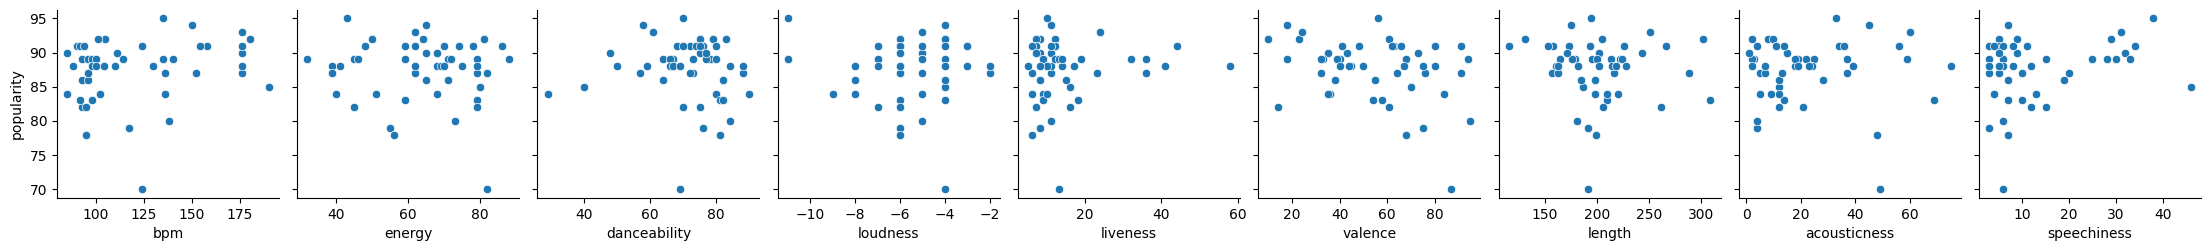

In [ ]:
# Visualize the relationship between popularity and other numerical features
sns.pairplot(df, x_vars=['bpm', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'length', 'acousticness', 'speechiness'], y_vars=['popularity'])
plt.show()

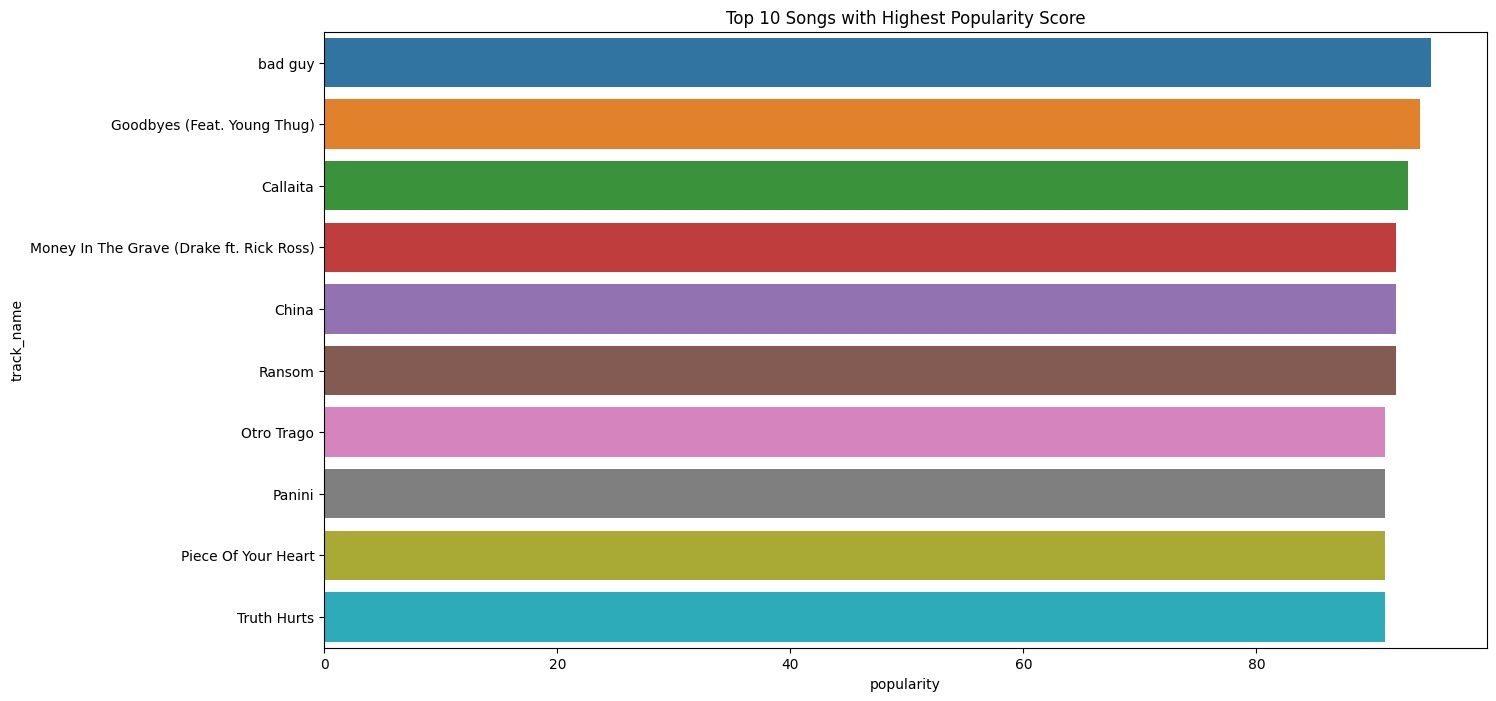

In [ ]:
# Visualize the top 10 songs with the highest popularity score
plt.figure(figsize=(15,8))
plt.title('Top 10 Songs with Highest Popularity Score')
sns.barplot(x='popularity', y='track_name', data=df.sort_values(by='popularity', ascending=False).iloc[:10])
plt.show()

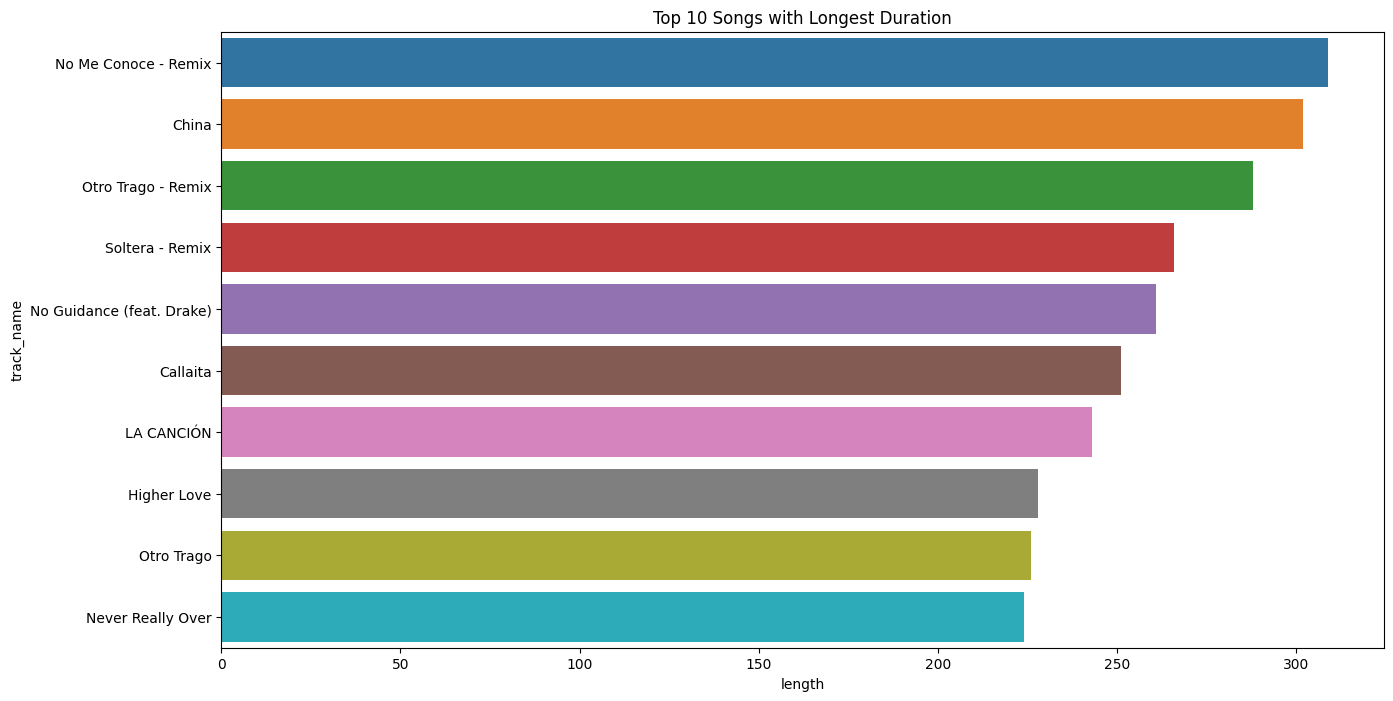

In [16]:
# Visualize the top 10 songs with the longest duration
plt.figure(figsize=(15,8))
plt.title('Top 10 Songs with Longest Duration')
sns.barplot(x='length', y='track_name', data=df.sort_values(by='length', ascending=False).iloc[:10])
plt.show()

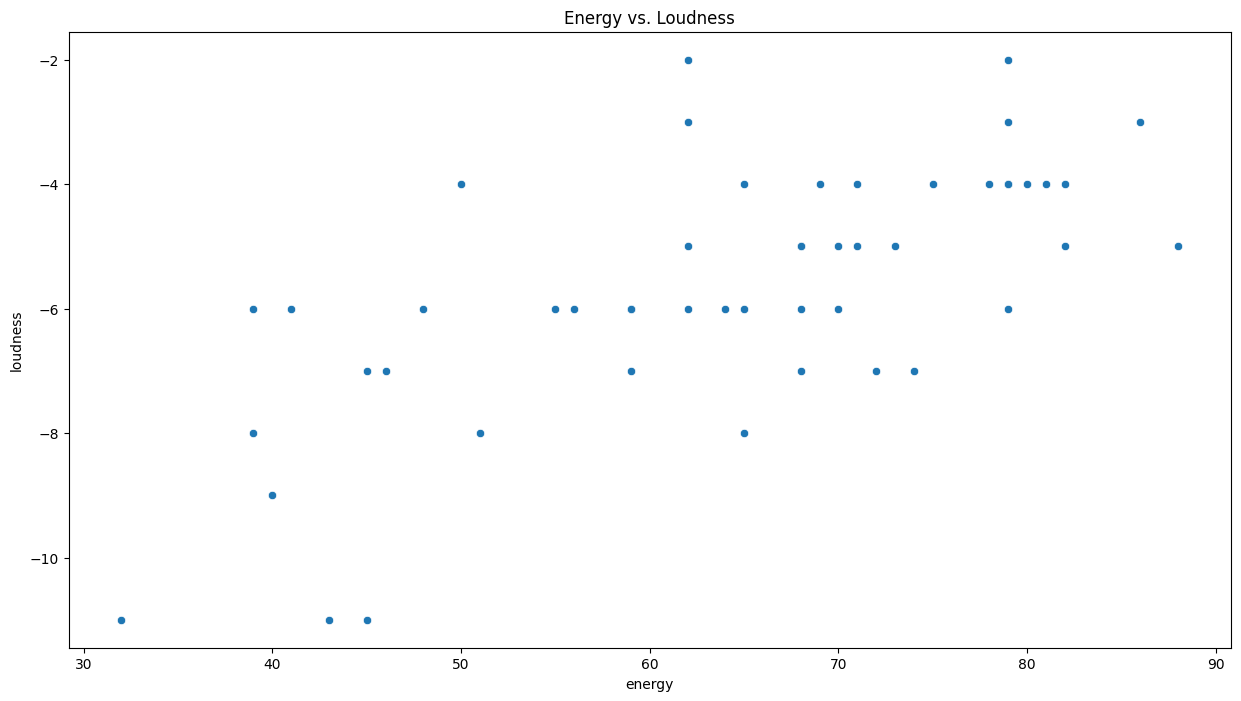

In [17]:
# Visualize the relationship between energy and loudness
plt.figure(figsize=(15,8))
plt.title('Energy vs. Loudness')
sns.scatterplot(x='energy', y='loudness', data=df)
plt.show()


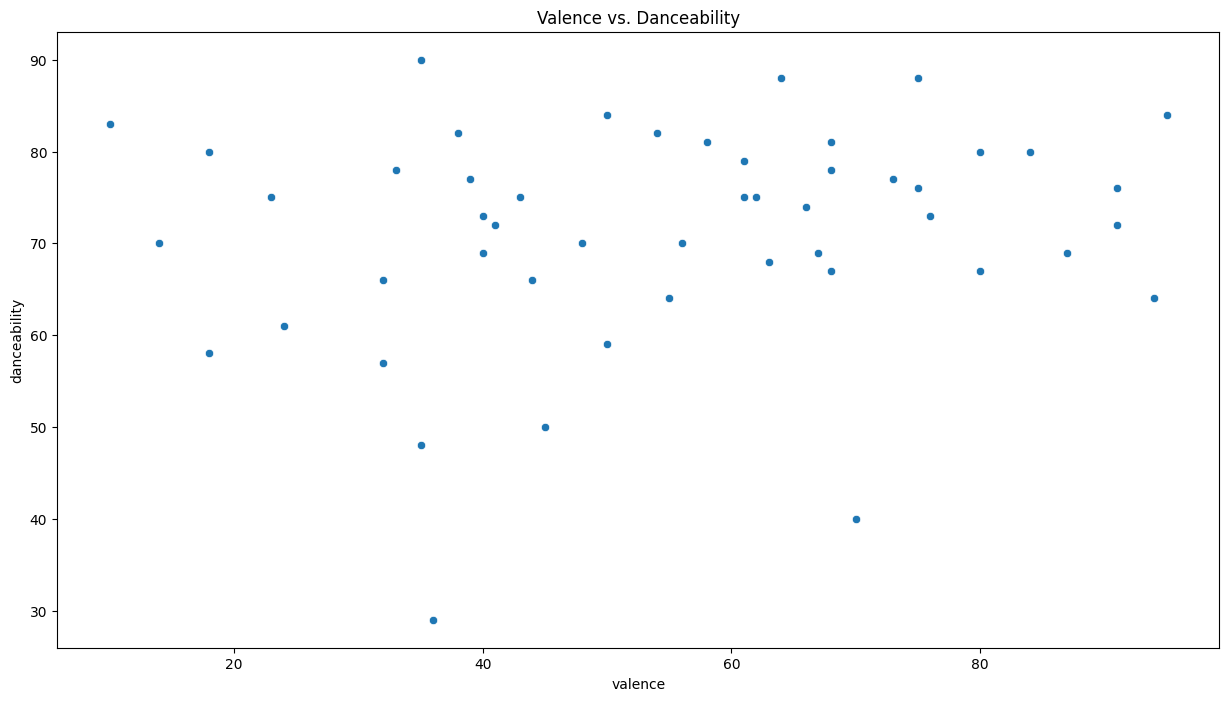

In [18]:
# Visualize the relationship between valence and danceability
plt.figure(figsize=(15,8))
plt.title('Valence vs. Danceability')
sns.scatterplot(x='valence', y='danceability', data=df)
plt.show()